Install the latest nsc if you haven't already done so. See source [here](https://test.pypi.org/project/nsc/) .

In [1]:
# !python3 -m pip uninstall nsc -y -q  # Uninstall current version of nsc
# !python3 -m pip install nsc -q  # Install latest prod version of nsc
# !python3 -m pip install -i https://test.pypi.org/simple/ nsc -q  # Install latest test version of nsc

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy
sns.set()
from collections import defaultdict
from typing import List

# From nsc lib
import nsc
from nsc import distributions as nsd
# from nsc.math import function as nsc_func
# nsd = nsc.distributions

Importing NSC lib v0.0.3.19.


### **Coupled Logarithm function**

In [3]:
n_sample = 10000

In [4]:
# n_sample of linearly spaced numbers, starting from CLOSE to 0
X = np.linspace(1e-6, 5, n_sample)
X

array([1.00000000e-06, 5.01049905e-04, 1.00109981e-03, ...,
       4.99899990e+00, 4.99949995e+00, 5.00000000e+00])

In [5]:
y = {}

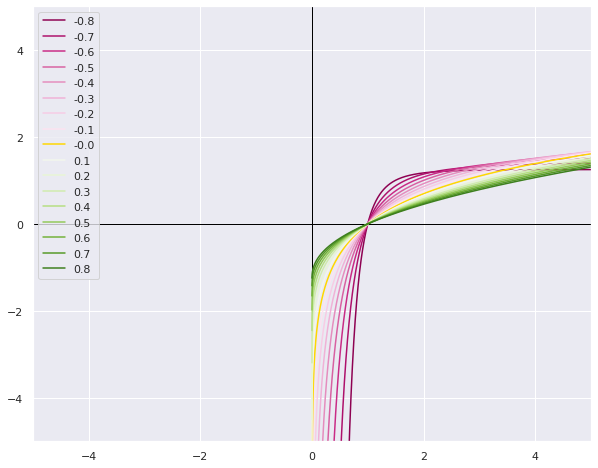

In [6]:
fig, ax = plt.subplots(figsize=(10, 8))
ax.axvline(c='black', lw=1)
ax.axhline(c='black', lw=1)

cm = plt.get_cmap('PiYG')
kappa_values = [round(value, 1) for value in np.arange(-0.8, 0.9, 0.1)]
n = len(kappa_values)
ax.set_prop_cycle(color=['gold' if kappa==0 else cm(1.*i/n) for i, kappa in enumerate(kappa_values)])

plt.xlim(-5, 5)
plt.ylim(-5, 5)

for kappa in kappa_values:
    y[kappa] = nsc.log(X, kappa)
    # y[kappa] = nsc_func.coupled_logarithm(X, kappa)
    plt.plot(X, y[kappa], label=kappa)

plt.legend()
plt.show();

Compare nsc's log with numpy's log.

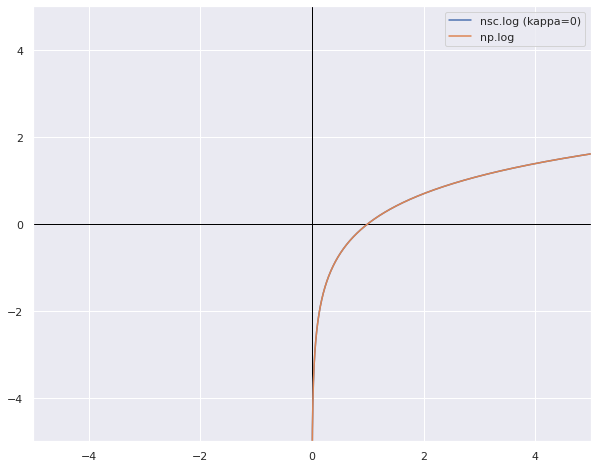

In [7]:
fig, ax = plt.subplots(figsize=(10, 8))
ax.axvline(c='black', lw=1)
ax.axhline(c='black', lw=1)

plt.xlim(-5, 5)
plt.ylim(-5, 5)

plt.plot(X, nsc.log(X, kappa=0), label='nsc.log (kappa=0)')
plt.plot(X, np.log(X), label='np.log')

plt.legend()
plt.show();

You can see that that nsc's log of kappa=0 is exactly equal to natural log in numpy.

### **Coupled Exponential function**

In [8]:
# n_sample of linearly spaced numbers, starting from -5
X = np.linspace(-5, 5, n_sample)

In [9]:
y = {}

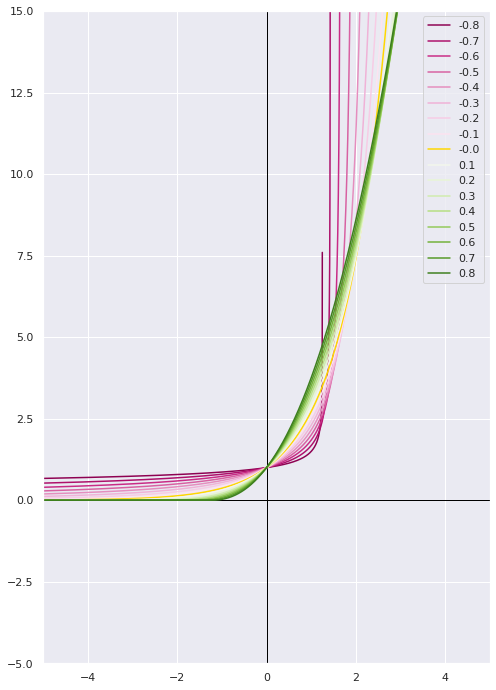

In [10]:
fig, ax = plt.subplots(figsize=(8, 12))
ax.axvline(c='black', lw=1)
ax.axhline(c='black', lw=1)

cm = plt.get_cmap('PiYG')
kappa_values = [round(value, 1) for value in np.arange(-0.8, 0.9, 0.1)]
n = len(kappa_values)
ax.set_prop_cycle(color=['gold' if kappa==0 else cm(1.*i/n) for i, kappa in enumerate(kappa_values)])

plt.xlim(-5, 5)
plt.ylim(-5, 15)

for kappa in kappa_values:
    y[kappa] = nsc.exp(X, kappa)
    plt.plot(X, y[kappa], label=kappa)

plt.legend()
plt.show();

Compare nsc's exp with numpy's exp.

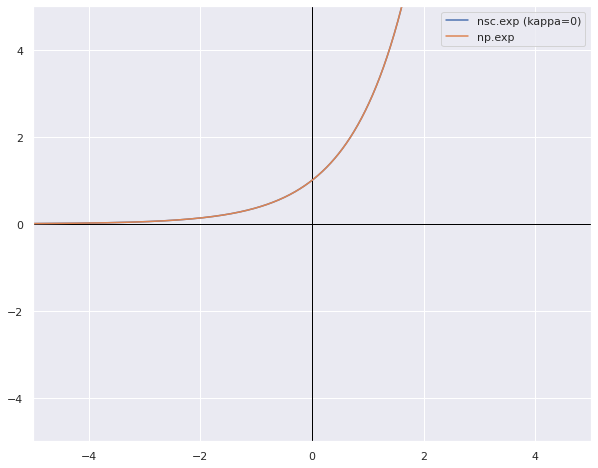

In [11]:
fig, ax = plt.subplots(figsize=(10, 8))
ax.axvline(c='black', lw=1)
ax.axhline(c='black', lw=1)

plt.xlim(-5, 5)
plt.ylim(-5, 5)

plt.plot(X, nsc.exp(X, kappa=0), label='nsc.exp (kappa=0)')
plt.plot(X, np.exp(X), label='np.exp')

plt.legend()
plt.show();

You can see that that nsc's exp of kappa=0 is exactly equal to natural exp in numpy.

### **Coupled Normal distribution class**

In [12]:
# Define the loc, scale, alpha, and kappas that will be used for all distributions.
loc, scale = 0., 1.
alpha = 2

In [13]:
# Define the values the various Coupled Gaussians can range from -6*scale to 6*scale
X = np.linspace(-6*scale, 6*scale, n_sample)

- Blue: As kappa -> 0, Coupled Normal -> Normal, the thinner the tail, the sharper the peak, the more dispersed at the sides
- Red: As kappa -> 1, Coupled Normal -> StudentT DF=1, the heavier the tail, the duller the peak, the more concentrated near center

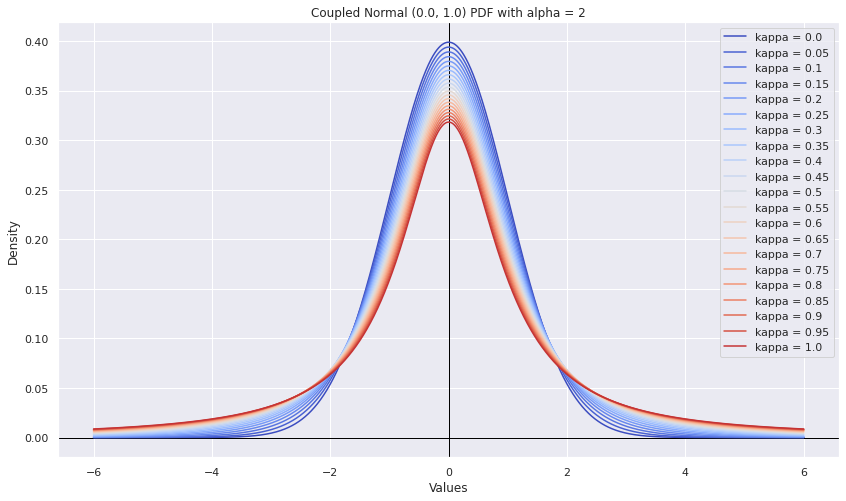

In [14]:
# Plot Coupled Gaussians (loc, scale) with alpha = 2, with kappas going from 0 to 1
# by steps of 0.1
fig, ax = plt.subplots(figsize=(14, 8))
ax.axvline(c='black', lw=1)
ax.axhline(c='black', lw=1)

# plt.figure(figsize=(12, 6), dpi=100, facecolor='w', edgecolor='k')

cm = plt.get_cmap('coolwarm')
kappa_values = np.linspace(0, 1, 21)
n = len(kappa_values)
ax.set_prop_cycle(color=[cm(1.*i/n) for i, kappa in enumerate(kappa_values)])

for kappa in kappa_values:
    temp_normal = nsd.CoupledNormal(loc=loc,
                                    scale=scale,
                                    kappa=round(kappa, 2),
                                    alpha=alpha
                                    )
    plt.plot(X, temp_normal.prob(X), label=f'kappa = {temp_normal.kappa}')

plt.title(f'Coupled Normal ({loc}, {scale}) PDF with alpha = {alpha}')
plt.xlabel('Values')
plt.ylabel('Density')
plt.legend()
plt.show();

Create a Coupled Normal distribution *p* to try out some of its functions.

In [15]:
# Pick a specific kappa
p_loc = 0.
p_scale = 1.
p_kappa = 0.5
p_alpha = 2

In [16]:
p_dist = nsd.CoupledNormal(loc=p_loc, scale=p_scale, kappa=p_kappa, alpha=p_alpha)
p_dist

<nsc.distributions.CoupledNormal batch_shape=[] event_shape=[]>

In [17]:
# Number of dimensions
p_dist.dim

1

In [18]:
p_pdf = p_dist.prob(X)
p_pdf

array([0.00426898, 0.00427141, 0.00427384, ..., 0.00427384, 0.00427141,
       0.00426898])

We will be using p_pdf in subsequent functions

Compare it with a Student-T with DoF = 2, same loc and scale.

In [19]:
import tensorflow_probability as tfp
tfd = tfp.distributions

In [20]:
t_dist = tfd.StudentT(df=1/p_kappa, loc=p_loc, scale=p_scale)

In [21]:
t_pdf = t_dist.prob(X)
t_pdf

<tf.Tensor: shape=(10000,), dtype=float32, numpy=
array([0.00426899, 0.00427141, 0.00427384, ..., 0.00427384, 0.00427141,
       0.00426899], dtype=float32)>

CoupledNormal of kappa = 0.5 is equivalent to Student-T with DoF = 2, given same loc and scale.

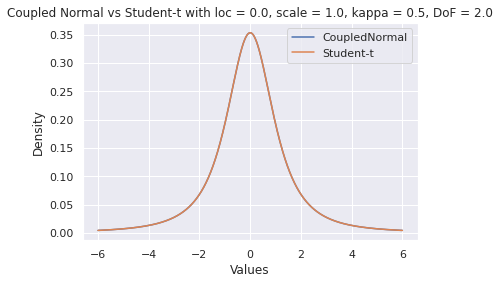

In [22]:
plt.plot(X, p_pdf, label=f'CoupledNormal')
plt.plot(X, t_pdf, label=f'Student-t')

plt.title(f'Coupled Normal vs Student-t with loc = {p_loc}, scale = {p_scale}, kappa = {p_kappa}, DoF = {1/p_kappa}')
plt.xlabel('Values')
plt.ylabel('Density')
plt.legend()
plt.show();

CoupledNormal of kappa = 0.25 is equivalent to Student-T with DoF = 4, given same loc and scale.

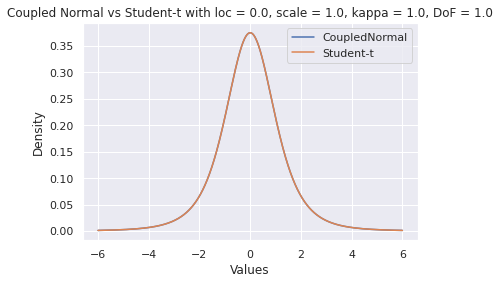

In [23]:
p_kappa = 0.25
p_dist = nsd.CoupledNormal(loc=p_loc, scale=p_scale, kappa=p_kappa, alpha=p_alpha)
p_pdf = p_dist.prob(X)

t_dist = tfd.StudentT(df=1/p_kappa, loc=p_loc, scale=p_scale)
t_pdf = t_dist.prob(X)

plt.plot(X, p_pdf, label=f'CoupledNormal')
plt.plot(X, t_pdf, label=f'Student-t')

plt.title(f'Coupled Normal vs Student-t with loc = {p_loc}, scale = {p_scale}, kappa = {kappa}, DoF = {1/kappa}')
plt.xlabel('Values')
plt.ylabel('Density')
plt.legend()
plt.show();

Same for CoupledNormal of kappa = 0.1 and Student-T with DoF = 10.

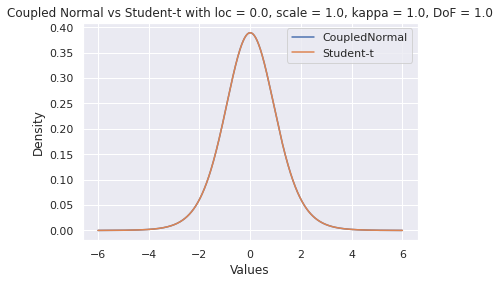

In [24]:
p_kappa = 0.1
p_dist = nsd.CoupledNormal(loc=p_loc, scale=p_scale, kappa=p_kappa, alpha=p_alpha)
p_pdf = p_dist.prob(X)

t_dist = tfd.StudentT(df=1/p_kappa, loc=p_loc, scale=p_scale)
t_pdf = t_dist.prob(X)

plt.plot(X, p_pdf, label=f'CoupledNormal')
plt.plot(X, t_pdf, label=f'Student-t')

plt.title(f'Coupled Normal vs Student-t with loc = {p_loc}, scale = {kappa}, kappa = {kappa}, DoF = {1/kappa}')
plt.xlabel('Values')
plt.ylabel('Density')
plt.legend()
plt.show();

CoupledNormal of kappa = 0.05 and Student-T with DoF = 20.

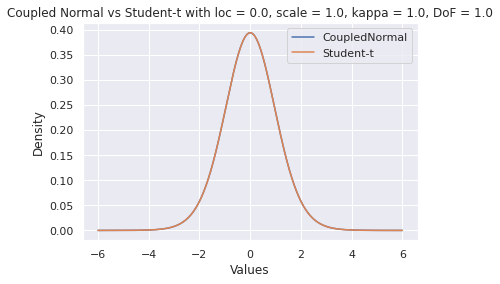

In [25]:
p_kappa = 0.05
p_dist = nsd.CoupledNormal(loc=p_loc, scale=p_scale, kappa=p_kappa, alpha=p_alpha)
p_pdf = p_dist.prob(X)

t_dist = tfd.StudentT(df=1/p_kappa, loc=p_loc, scale=p_scale)
t_pdf = t_dist.prob(X)

plt.plot(X, p_pdf, label=f'CoupledNormal')
plt.plot(X, t_pdf, label=f'Student-t')

plt.title(f'Coupled Normal vs Student-t with loc = {p_loc}, scale = {p_scale}, kappa = {kappa}, DoF = {1/kappa}')
plt.xlabel('Values')
plt.ylabel('Density')
plt.legend()
plt.show();

CoupledNormal of kappa = 0.01 and Student-T with DoF = 100.

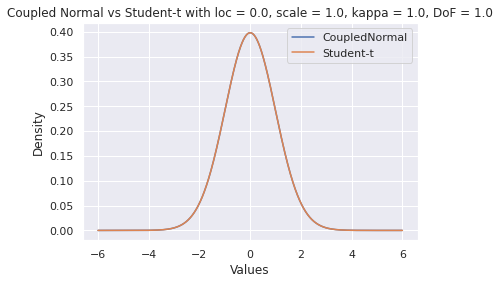

In [26]:
p_kappa = 0.01
p_dist = nsd.CoupledNormal(loc=p_loc, scale=p_scale, kappa=p_kappa, alpha=p_alpha)
p_pdf = p_dist.prob(X)

t_dist = tfd.StudentT(df=1/p_kappa, loc=p_loc, scale=p_scale)
t_pdf = t_dist.prob(X)

plt.plot(X, p_pdf, label=f'CoupledNormal')
plt.plot(X, t_pdf, label=f'Student-t')

plt.title(f'Coupled Normal vs Student-t with loc = {p_loc}, scale = {p_scale}, kappa = {kappa}, DoF = {1/kappa}')
plt.xlabel('Values')
plt.ylabel('Density')
plt.legend()
plt.show();

Same for CoupledNormal of kappa = 0.001 and Student-T with DoF = 1000.

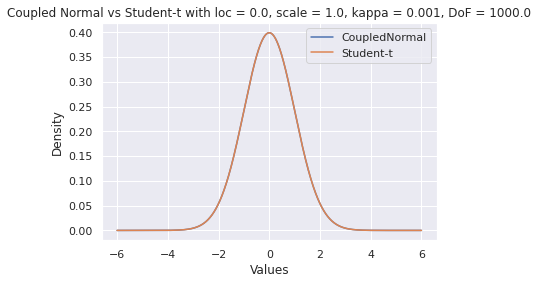

In [27]:
p_kappa = 0.001
p_dist = nsd.CoupledNormal(loc=p_loc, scale=p_scale, kappa=p_kappa, alpha=p_alpha)
p_pdf = p_dist.prob(X)

t_dist = tfd.StudentT(df=1/p_kappa, loc=p_loc, scale=p_scale)
t_pdf = t_dist.prob(X)

plt.plot(X, p_pdf, label=f'CoupledNormal')
plt.plot(X, t_pdf, label=f'Student-t')

plt.title(f'Coupled Normal vs Student-t with loc = {p_loc}, scale = {p_scale}, kappa = {p_kappa}, DoF = {1/p_kappa}')
plt.xlabel('Values')
plt.ylabel('Density')
plt.legend()
plt.show();

Same for CoupledNormal of kappa = 0.0001 and Student-T with DoF = 10000.

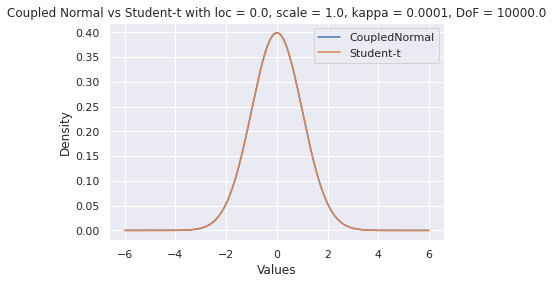

In [28]:
p_kappa = 0.0001
p_dist = nsd.CoupledNormal(loc=p_loc, scale=p_scale, kappa=p_kappa, alpha=p_alpha)
p_pdf = p_dist.prob(X)

t_dist = tfd.StudentT(df=1/p_kappa, loc=p_loc, scale=p_scale)
t_pdf = t_dist.prob(X)

plt.plot(X, p_pdf, label=f'CoupledNormal')
plt.plot(X, t_pdf, label=f'Student-t')

plt.title(f'Coupled Normal vs Student-t with loc = {p_loc}, scale = {p_scale}, kappa = {p_kappa}, DoF = {1/p_kappa}')
plt.xlabel('Values')
plt.ylabel('Density')
plt.legend()
plt.show();

As kappa -> 0, CoupleNormal -> Normal distribution. Just like as DoF -> inf, Student-t -> Normal.

In [29]:
# Sample n amount
# n_sample = 1000000
p_sampled = p_dist.sample_n(n_sample)

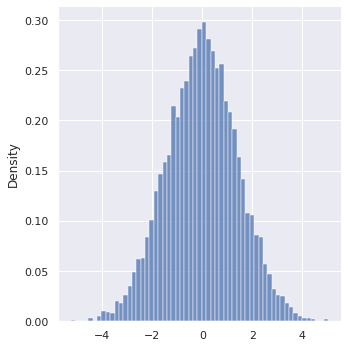

In [30]:
sns.displot(p_sampled, stat='density');

Get normalized term for very small kappa

In [31]:
kappa=0.00001

In [32]:
k_dist = nsd.CoupledNormal(loc=loc, scale=scale, kappa=kappa, alpha=alpha)

In [33]:
k_dist._normalized_term()

2.5066345412434026

In [34]:
k_dist.prob(X)

array([6.09448375e-09, 6.13850692e-09, 6.18283920e-09, ...,
       6.18283920e-09, 6.13850692e-09, 6.09448375e-09])

### **Multivariate Coupled Normal distribution class**

In [35]:
# batch_shape is [] while event_shape is [2]
mcn = nsd.MultivariateCoupledNormal(loc=[0., 1.], scale=[1., 2.], kappa=0.1)
mcn

<nsc.distributions.MultivariateCoupledNormal batch_shape=[] event_shape=[2]>

In [36]:
print(mcn.dim)
print(mcn.loc)
print(mcn.scale)
print(mcn.kappa)
print(mcn.alpha)

2
[0. 1.]
[[1. 0.]
 [0. 2.]]
0.1
2


Create 2nd X variable from -12 to 12.

In [37]:
X2 = np.linspace(-12*scale, 12*scale, n_sample)
X2

array([-12.        , -11.99759976, -11.99519952, ...,  11.99519952,
        11.99759976,  12.        ])

Create a 2D X by column-stacking the existing X with X2.

In [38]:
X_2D = np.column_stack((X, X2))
X_2D

array([[ -6.        , -12.        ],
       [ -5.99879988, -11.99759976],
       [ -5.99759976, -11.99519952],
       ...,
       [  5.99759976,  11.99519952],
       [  5.99879988,  11.99759976],
       [  6.        ,  12.        ]])

Get the Multivariate Coupled Normal's PDF as 1D vector

In [39]:
mcn.prob(X_2D)

array([1.68461961e-07, 1.68805977e-07, 1.69150746e-07, ...,
       4.06666062e-07, 4.05783531e-07, 4.04903050e-07])

In [40]:
mcn.prob(X_2D, beta_func=False)

array([4.32943539e-07, 4.33827652e-07, 4.34713702e-07, ...,
       1.04512285e-06, 1.04285476e-06, 1.04059194e-06])

In [41]:
mcn._normalized_term(beta_func=True), mcn._normalized_term(beta_func=False)

(12.566370614359169, 4.889680162071525)

In [42]:
# Sample n amount
# n_sample = 1000000
mcn_sampled = mcn.sample_n(n_sample)

In [43]:
mcn_sampled

array([[-0.55400211,  2.6826343 ],
       [-0.94708782,  0.2064314 ],
       [-1.26803815,  0.90207849],
       ...,
       [-1.54350953,  0.80477835],
       [ 1.11335741,  4.04631809],
       [-1.59222529,  2.82698898]])

Get normalized term for very small kappa

In [44]:
kappa=0.00001

In [45]:
kk_dist = nsd.MultivariateCoupledNormal(loc=[0., 1.], scale=[1., 2.], kappa=kappa, alpha=alpha)

In [46]:
kk_dist._normalized_term(beta_func=True)

12.566370613627978

In [47]:
kk_dist.prob(X_2D)

array([8.22855154e-19, 8.35281523e-19, 8.47893112e-19, ...,
       3.39811906e-16, 3.35158663e-16, 3.30568189e-16])

In [48]:
# Sample n amount
# n_sample = 1000000
kk_sampled = kk_dist.sample_n(n_sample)

In [49]:
kk_sampled

array([[-1.11533544,  2.4412737 ],
       [ 0.56704702,  0.35827289],
       [-0.85122335,  1.88432154],
       ...,
       [-0.8614612 ,  1.98319633],
       [ 1.32766457,  1.82840319],
       [ 0.78204921,  0.95299456]])

In [50]:
kk_dist.sample_n(n_sample)

array([[ 0.60344308,  2.63327686],
       [ 0.50413033,  1.06153964],
       [ 1.29096041,  1.1539164 ],
       ...,
       [-0.07763349,  0.24651661],
       [ 0.21886069,  3.16667805],
       [-1.15738488,  2.57402474]])

### **Coupled Entropy function**

In [51]:
factor = 26

In [52]:
# Set dim 1 for scalar inputs
p_dim = 1
p_support = [[-p_scale*factor, p_scale*factor]]
# p_support_inf = [[-np.inf, np.inf]]

In [53]:
p_loc, p_scale, p_kappa, p_alpha, p_dim

(0.0, 1.0, 0.0001, 2, 1)

In [54]:
p_dist.loc, p_dist.scale, p_dist.kappa, p_dist.alpha, p_dist.dim

(0.0, 1.0, 0.0001, 2, 1)

In [55]:
nsc.entropy(p_dist.prob,
            p_dist.sample_n,
            kappa=p_kappa,
            alpha=p_alpha,
            dim=p_dim,
            root=False
            )

1.9166043846377567

Plot coupled entropy function in comparison with other common entropy functions

In [56]:
import numpy as np
from tqdm import tqdm
from scipy.stats import norm, cauchy, multivariate_normal

In [57]:
kappa_values = [round(value, 1) for value in np.linspace(0, 4, 41)]
n = len(kappa_values)
mu, scale = 0., 1.
dim = 1
alpha = 2
support = [[-p_scale*factor, p_scale*factor]]
# support_inf = [[-np.inf, np.inf]]

In [58]:
# plt.figure(figsize=(12, 8))
Y = {}
plot_coupledEntropy = []
plot_coupledEntropy_root = []
# plot_tsallisEntropyNormalized = []
# plot_tsallisEntropy = []
# plot_tsallisEntropyRootNormalized = []
# plot_tsallisEntropyRoot = []
# plot_shannonEntropy = []
# plot_shannonEntropy_root = []

In [59]:
for i in tqdm(range(len(kappa_values))): 
    kappa = kappa_values[i]
    temp_normal = nsd.CoupledNormal(loc=loc, scale=scale, kappa=kappa)
    y = temp_normal.prob
    y_sample = temp_normal.sample_n
    Y[kappa] = nsc.entropy(y, y_sample, kappa=kappa, alpha=alpha, dim=dim, root=False)
    plot_coupledEntropy.append(Y[kappa])
    Y[kappa] = nsc.entropy(y, y_sample, kappa=kappa, alpha=alpha, dim=dim, root=True)
    plot_coupledEntropy_root.append(Y[kappa])
    '''
    Y[kappa] = nsc.tsallis_entropy(y, kappa=kappa, alpha=alpha, dim=dim, support=support, normalize=True, root=False)
    plot_tsallisEntropyNormalized.append(Y[kappa])
    Y[kappa] = nsc.tsallis_entropy(y, kappa=kappa, alpha=alpha, dim=dim, support=support, normalize=False, root=False)
    plot_tsallisEntropy.append(Y[kappa])
    Y[kappa] = nsc.tsallis_entropy(y, kappa=kappa, alpha=alpha, dim=dim, support=support, normalize=True, root=True)
    plot_tsallisEntropyRootNormalized.append(Y[kappa])
    Y[kappa] = nsc.tsallis_entropy(y, kappa=kappa, alpha=alpha, dim=dim, support=support, normalize=False, root=True)
    plot_tsallisEntropyRoot.append(Y[kappa])
    Y[kappa] = nsc.shannon_entropy(y, dim=dim, support=support, root=False)
    plot_shannonEntropy.append(Y[kappa])
    Y[kappa] = nsc.shannon_entropy(y, dim=dim, support=support, root=True)
    plot_shannonEntropy_root.append(Y[kappa])
    '''

plot_coupledEntropy = np.array(plot_coupledEntropy)
plot_coupledEntropy_root = np.array(plot_coupledEntropy_root)
# plot_tsallisEntropyNormalized = np.array(plot_tsallisEntropyNormalized)
# plot_tsallisEntropy = np.array(plot_tsallisEntropy)
# plot_tsallisEntropyRootNormalized = np.array(plot_tsallisEntropyRootNormalized)
# plot_tsallisEntropyRoot = np.array(plot_tsallisEntropyRoot)
# plot_shannonEntropy = np.array(plot_shannonEntropy)
# plot_shannonEntropy_root = np.array(plot_shannonEntropy_root)

100%|██████████| 41/41 [00:02<00:00, 19.77it/s]


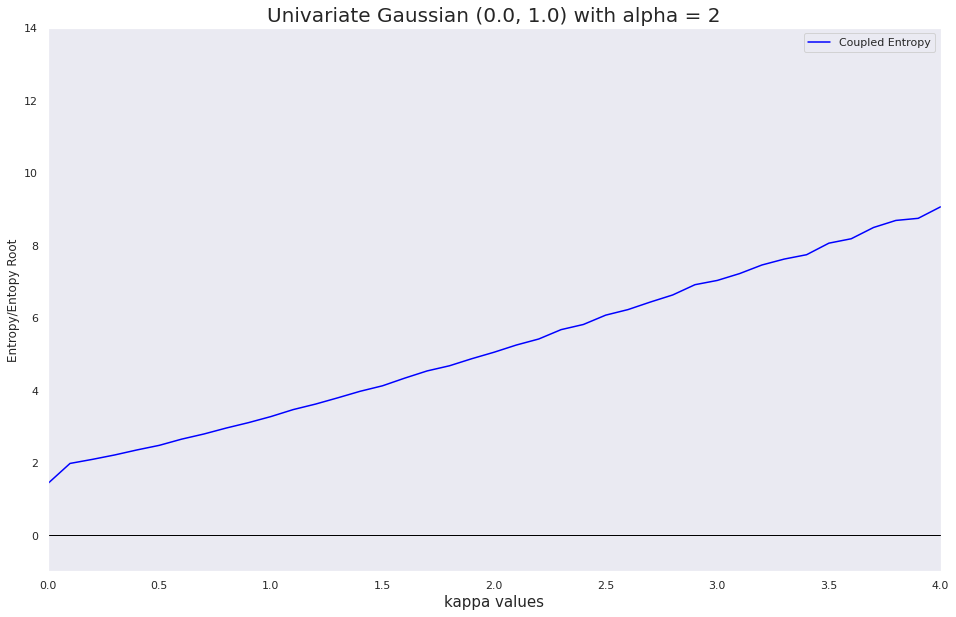

In [60]:
fig, ax = plt.subplots(figsize=(16, 10))
ax.axvline(c='black', lw=1)
ax.axhline(c='black', lw=1)

cm = plt.get_cmap('PiYG')
plt.xlim(0, 4)
plt.ylim(-1, 14)

plt.plot(kappa_values, plot_coupledEntropy, label='Coupled Entropy', color='blue')
# plt.plot(kappa_values, plot_tsallisEntropyNormalized, label='Normalized Tsallis Entropy', color='green')
# plt.plot(kappa_values, plot_tsallisEntropy, label='Tsallis Entropy', color='orange')
# plt.plot(kappa_values, plot_shannonEntropy, label='Shannon Entropy', color='red')

plt.grid()
plt.title(f'Univariate Gaussian {(mu), (scale)} with alpha = {alpha}', fontsize=20)
plt.xlabel('kappa values', fontsize=15)
plt.ylabel('Entropy/Entopy Root')
plt.legend()
plt.show();

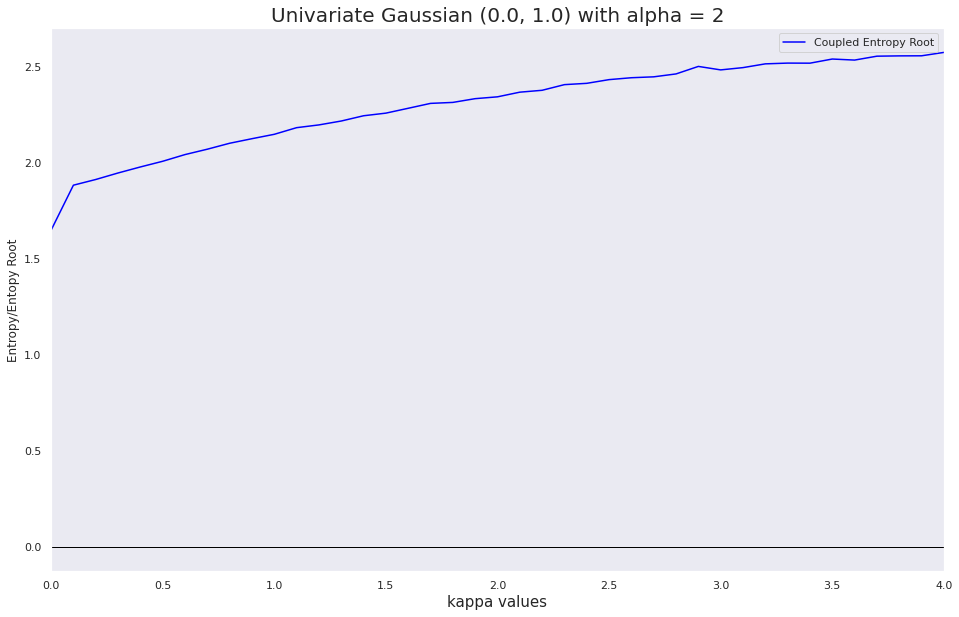

In [61]:
fig, ax = plt.subplots(figsize=(16, 10))
ax.axvline(c='black', lw=1)
ax.axhline(c='black', lw=1)

cm = plt.get_cmap('PiYG')
plt.xlim(0, 4)
# plt.ylim(-1, 6)

plt.plot(kappa_values, plot_coupledEntropy_root, label='Coupled Entropy Root', color='blue')
# plt.plot(kappa_values, plot_tsallisEntropyRootNormalized, label='Normalized Tsallis Entropy Root', color='green')
# plt.plot(kappa_values, plot_tsallisEntropyRoot, label='Tsallis Entropy Root', color='orange')
# plt.plot(kappa_values, plot_shannonEntropy_root, label='Shannon Entropy Root', color='red')

plt.grid()
plt.title(f'Univariate Gaussian {mu, scale} with alpha = {alpha}', fontsize=20)
plt.xlabel('kappa values', fontsize=15)
plt.ylabel('Entropy/Entopy Root')
plt.legend()
plt.show();

### **Coupled Cross-Entropy function**

Create a new Coupled Normal distribution *q* with the kappa of 0. Hence, it is a regular Normal distribution.

In [62]:
q_loc = 1.
q_scale = 2.
q_kappa = 0.1
q_alpha = 2
q_dim = 1

In [63]:
q_dist = nsd.CoupledNormal(loc=q_loc, scale=q_scale, kappa=q_kappa, alpha=q_alpha)
q_pdf = q_dist.prob(X)

In [64]:
nsc.cross_entropy(p_dist.prob,
                  q_dist.prob,
                  p_dist.sample_n,
                  kappa=p_kappa,
                  alpha=p_alpha,
                  dim=p_dim,
                  root=False
                  )

2.01031556728693

### **Coupled KL-Divergence function**

In [65]:
p_dist.loc, p_dist.scale, p_dist.kappa, p_dist.alpha, p_dist.dim

(0.0, 1.0, 0.0001, 2, 1)

In [66]:
q_dist.loc, q_dist.scale, q_dist.kappa, q_dist.alpha, q_dist.dim

(1.0, 2.0, 0.1, 2, 1)

In [67]:
nsc.kl_divergence(p_dist.prob,
                  q_dist.prob,
                  p_dist.sample_n,
                  kappa=p_kappa,
                  alpha=p_alpha,
                  dim=p_dim,
                  root=False
                  )

0.09371118264917344

In [68]:
nsc.kl_divergence(p_dist.prob,
                  q_dist.prob,
                  p_dist.sample_n,
                  kappa=p_kappa,
                  alpha=p_alpha,
                  dim=dim,
                  root=True
                  )

0.12607529897213499

In [69]:
nsc.kl_divergence(p_dist.prob,
                  q_dist.prob,
                  p_dist.sample_n,
                  kappa=q_kappa,
                  alpha=q_alpha,
                  dim=dim,
                  root=False
                  )

0.24826736855551834

In [70]:
nsc.kl_divergence(p_dist.prob,
                  q_dist.prob,
                  p_dist.sample_n,
                  kappa=q_kappa,
                  alpha=q_alpha,
                  dim=dim,
                  root=True
                  )

0.22189283539378768

In [71]:
nsc.kl_divergence(p_dist.prob,
                  q_dist.prob,
                  p_dist.sample_n,
                  kappa=p_kappa,
                  alpha=p_alpha,
                  dim=dim,
                  root=False
                  )

0.09371118264917344

### **Bivariate Coupled Entropy function**

Set the multivariariate coupled normal distribution **mcn** as the new p_dist

In [72]:
p_dist = mcn
factor = 10

In [73]:
# Set dim 2 for scalar inputs
p_loc = p_dist.loc
p_scale = p_dist.scale
p_kappa = p_dist.kappa
p_alpha = p_dist.alpha
p_dim =  p_dist.dim
p_scale_d1, p_scale_d2 = np.diag(p_scale)

p_support = [[-p_scale_d1*factor, p_scale_d1*factor], [-p_scale_d2*factor, p_scale_d2*factor]]
p_support_inf = [[-np.inf, np.inf], [-np.inf, np.inf]]

In [74]:
p_loc, p_scale, p_kappa, p_alpha, p_dim

(array([0., 1.]),
 array([[1., 0.],
        [0., 2.]]),
 0.1,
 2,
 2)

In [75]:
nsc.entropy(p_dist.prob,
            p_dist.sample_n,
            kappa=p_kappa,
            alpha=p_alpha,
            dim=p_dim,
            root=False
            )

3.996947352936583

Plot coupled entropy function in comparison with other common entropy functions

In [76]:
import numpy as np
from tqdm import tqdm
from scipy.stats import norm, cauchy, multivariate_normal

In [77]:
kappa_values = [round(value, 1) for value in np.linspace(0, 4, 41)]
n = len(kappa_values)
mu, cov = [0, 0], np.array([[1, 0], [0, 1]])
dim = len(mu)
alpha = 2
cov_d1, cov_d2 = np.diag(cov)

# support = [[-cov_d1*factor, cov_d1*factor], [-cov_d2*factor, cov_d2*factor]]
# support_inf = [[-np.inf, np.inf], [-np.inf, np.inf]]

In [78]:
# plt.figure(figsize=(12, 8))
Y = {}
plot_coupledEntropy = []
plot_coupledEntropy_root = []
# plot_tsallisEntropyNormalized = []
# plot_tsallisEntropy = []
# plot_tsallisEntropyRootNormalized = []
# plot_tsallisEntropyRoot = []
# plot_shannonEntropy = []
# plot_shannonEntropy_root = []

This part will take a while to run ...

In [79]:
for i in tqdm(range(len(kappa_values))): 
    kappa = kappa_values[i]
    support = [[-cov_d1*factor, cov_d1*factor], [-cov_d2*factor, cov_d2*factor]] if kappa < 0.2 else \
              [[-np.inf, np.inf], [-np.inf, np.inf]]
    # temp_normal = multivariate_normal(mean=mu, cov=cov)
    temp_normal = nsd.MultivariateCoupledNormal(loc=mu, scale=cov, kappa=kappa)
    y = temp_normal.prob
    y_sample = temp_normal.sample_n
    Y[kappa] = nsc.entropy(y, y_sample, kappa=kappa, alpha=alpha, dim=dim, root=False)
    plot_coupledEntropy.append(Y[kappa])
    Y[kappa] = nsc.entropy(y, y_sample, kappa=kappa, alpha=alpha, dim=dim, root=True)
    plot_coupledEntropy_root.append(Y[kappa])
#     Y[kappa] = nsc.tsallis_entropy(y, kappa=kappa, alpha=alpha, dim=dim, support=support, normalize=True, root=False)
#     plot_tsallisEntropyNormalized.append(Y[kappa])
#     Y[kappa] = nsc.tsallis_entropy(y, kappa=kappa, alpha=alpha, dim=dim, support=support, normalize=False, root=False)
#     plot_tsallisEntropy.append(Y[kappa])
#     Y[kappa] = nsc.tsallis_entropy(y, kappa=kappa, alpha=alpha, dim=dim, support=support, normalize=True, root=True)
#     plot_tsallisEntropyRootNormalized.append(Y[kappa])
#     Y[kappa] = nsc.tsallis_entropy(y, kappa=kappa, alpha=alpha, dim=dim, support=support, normalize=False, root=True)
#     plot_tsallisEntropyRoot.append(Y[kappa])
#     Y[kappa] = nsc.shannon_entropy(y, dim=dim, support=support, root=False)
#     plot_shannonEntropy.append(Y[kappa])
#     Y[kappa] = nsc.shannon_entropy(y, dim=dim, support=support, root=True)
#     plot_shannonEntropy_root.append(Y[kappa])

plot_coupledEntropy = np.array(plot_coupledEntropy)
plot_coupledEntropy_root = np.array(plot_coupledEntropy_root)
# plot_tsallisEntropyNormalized = np.array(plot_tsallisEntropyNormalized)
# plot_tsallisEntropy = np.array(plot_tsallisEntropy)
# plot_tsallisEntropyRootNormalized = np.array(plot_tsallisEntropyRootNormalized)
# plot_tsallisEntropyRoot = np.array(plot_tsallisEntropyRoot)
# plot_shannonEntropy = np.array(plot_shannonEntropy)
# plot_shannonEntropy_root = np.array(plot_shannonEntropy_root)

  0%|          | 0/41 [00:00<?, ?it/s]/home/kevin/anaconda3/envs/nsc/lib/python3.7/site-packages/nsc/distributions/multivariate_coupled_normal.py:76: RuntimeWarning: divide by zero encountered in double_scalars
  chi2_samples = np.random.chisquare(df=1/self._kappa, size=n)
/home/kevin/anaconda3/envs/nsc/lib/python3.7/site-packages/nsc/distributions/multivariate_coupled_normal.py:78: RuntimeWarning: invalid value encountered in multiply
  samples_T = mvn_samples.T / np.sqrt(chi2_samples*self._kappa)
100%|██████████| 41/41 [00:58<00:00,  1.44s/it]


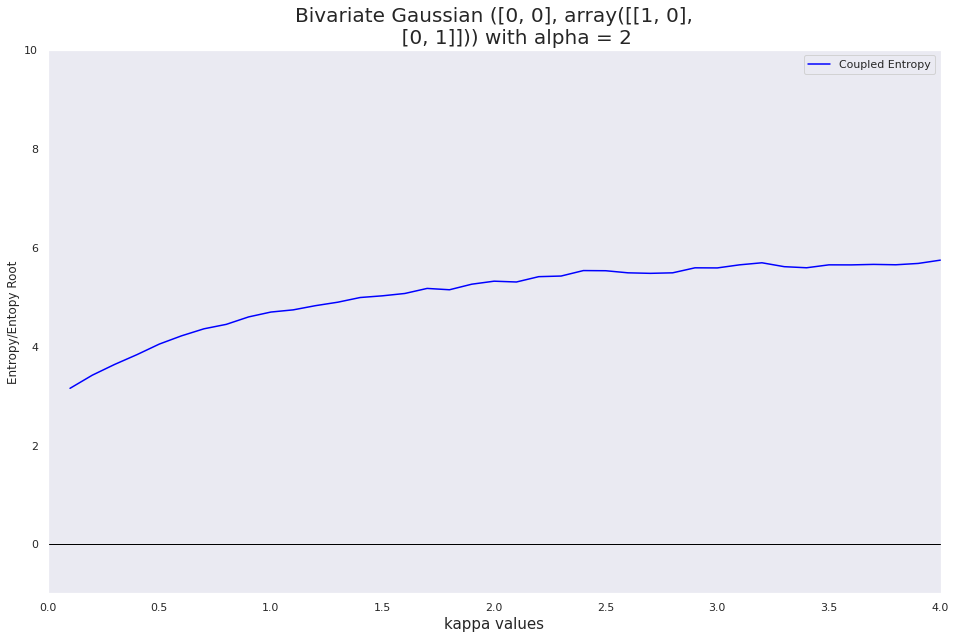

In [80]:
fig, ax = plt.subplots(figsize=(16, 10))
ax.axvline(c='black', lw=1)
ax.axhline(c='black', lw=1)

cm = plt.get_cmap('PiYG')
plt.xlim(0, 4)
plt.ylim(-1, 10)

plt.plot(kappa_values, plot_coupledEntropy, label='Coupled Entropy', color='blue')
# plt.plot(kappa_values, plot_tsallisEntropyNormalized, label='Normalized Tsallis Entropy', color='green')
# plt.plot(kappa_values, plot_tsallisEntropy, label='Tsallis Entropy', color='orange')
# plt.plot(kappa_values, plot_shannonEntropy, label='Shannon Entropy', color='red')

plt.grid()
plt.title(f'Bivariate Gaussian {(mu), (cov)} with alpha = {alpha}', fontsize=20)
plt.xlabel('kappa values', fontsize=15)
plt.ylabel('Entropy/Entopy Root')
plt.legend()
plt.show();

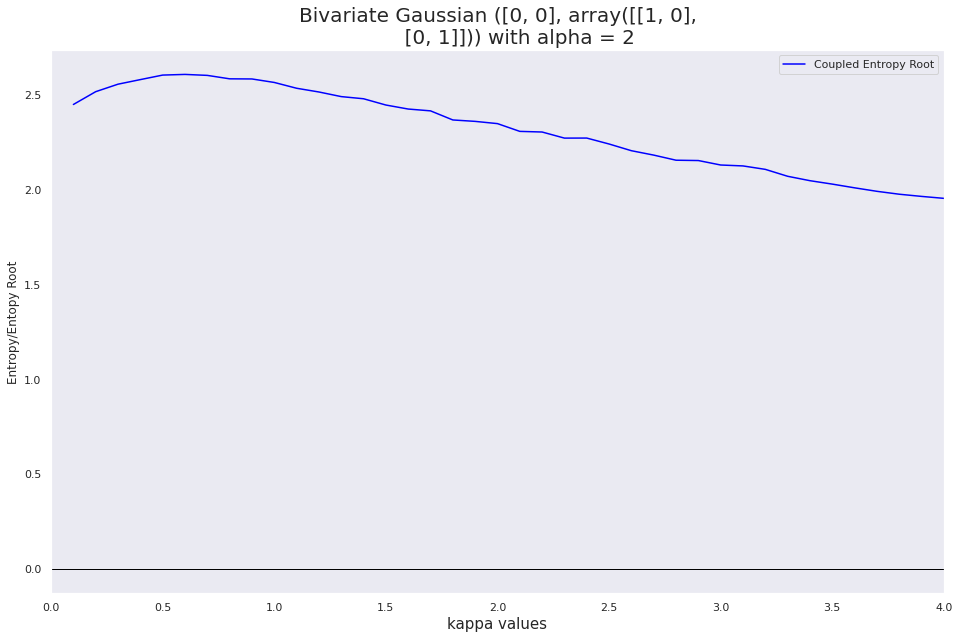

In [81]:
fig, ax = plt.subplots(figsize=(16, 10))
ax.axvline(c='black', lw=1)
ax.axhline(c='black', lw=1)

cm = plt.get_cmap('PiYG')
plt.xlim(0, 4)
# plt.ylim(-1, 6)

plt.plot(kappa_values, plot_coupledEntropy_root, label='Coupled Entropy Root', color='blue')
# plt.plot(kappa_values, plot_tsallisEntropyRootNormalized, label='Normalized Tsallis Entropy Root', color='green')
# plt.plot(kappa_values, plot_tsallisEntropyRoot, label='Tsallis Entropy Root', color='orange')
# plt.plot(kappa_values, plot_shannonEntropy_root, label='Shannon Entropy Root', color='red')

plt.grid()
plt.title(f'Bivariate Gaussian {mu, cov} with alpha = {alpha}', fontsize=20)
plt.xlabel('kappa values', fontsize=15)
plt.ylabel('Entropy/Entopy Root')
plt.legend()
plt.show();

### **Bivariate Coupled Cross-Entropy function**

Create a new Coupled Normal distribution *q* with the kappa of 0. Hence, it is a regular Normal distribution.

In [82]:
q_loc = [1., 2.]
q_scale = [2., 4.]
q_kappa = 0.001
q_alpha = 2
q_dim = 1

In [83]:
p_scale_d1, p_scale_d2 = np.diag(p_scale)

support = [[-p_scale_d1*10, p_scale_d1*10], [-p_scale_d2*10, p_scale_d2*10]]
support_inf = [[-np.inf, np.inf], [-np.inf, np.inf]]

In [84]:
q_dist = nsd.MultivariateCoupledNormal(loc=q_loc, scale=q_scale, kappa=q_kappa, alpha=q_alpha)
q_pdf = q_dist.prob(X_2D)
q_pdf

array([1.07705235e-07, 1.08148581e-07, 1.08593678e-07, ...,
       3.96640967e-05, 3.95465425e-05, 3.94293093e-05])

In [85]:
nsc.cross_entropy(p_dist.prob,
                  q_dist.prob,
                  p_dist.sample_n,
                  kappa=p_kappa,
                  alpha=p_alpha,
                  dim=p_dim,
                  root=False
                  )

5.148662526639609

In [86]:
# Alternative and direct way to do cross_entropy
p_dist.cross_entropy(q_dist, root=False)

5.148662526639609

### **Bivariate Coupled KL-Divergence function**

In [87]:
p_dist.loc, p_dist.scale, p_dist.kappa, p_dist.alpha, p_dist.dim

(array([0., 1.]),
 array([[1., 0.],
        [0., 2.]]),
 0.1,
 2,
 2)

In [88]:
q_dist.loc, q_dist.scale, q_dist.kappa, q_dist.alpha, q_dist.dim

(array([1., 2.]),
 array([[2., 0.],
        [0., 4.]]),
 0.001,
 2,
 2)

In [89]:
nsc.kl_divergence(p_dist.prob,
                  q_dist.prob,
                  p_dist.sample_n,
                  kappa=p_kappa,
                  alpha=p_alpha,
                  dim=dim,
                  root=False
                  )

1.151715173703026

In [90]:
# Alternative and direct way to do kl_divergence
p_dist.kl_divergence(q_dist, root=False)

1.151715173703026

In [91]:
nsc.kl_divergence(p_dist.prob,
                  q_dist.prob,
                  p_dist.sample_n,
                  kappa=p_kappa,
                  alpha=p_alpha,
                  dim=dim,
                  root=True
                  )

0.41989810283275686

In [92]:
p_dist.kl_divergence(q_dist, root=True)

0.41989810283275686

In [93]:
nsc.kl_divergence(p_dist.prob,
                  q_dist.prob,
                  p_dist.sample_n,
                  kappa=q_kappa,
                  alpha=q_alpha,
                  dim=dim,
                  root=False
                  )

0.6705630220741545

In [94]:
nsc.kl_divergence(p_dist.prob,
                  q_dist.prob,
                  p_dist.sample_n,
                  kappa=q_kappa,
                  alpha=q_alpha,
                  dim=dim,
                  root=True
                  )

0.261250085618963

In [95]:
nsc.kl_divergence(p_dist.prob,
                  q_dist.prob,
                  p_dist.sample_n,
                  kappa=p_kappa,
                  alpha=p_alpha,
                  dim=dim,
                  root=False
                  )

1.151715173703026

### **Generalized Mean function**

In [96]:
# TO-DO

Credits: Kevin R. Chen and John Clements